# **Lab7 RNN**

Group Members: Christina DeSantiago, Estefy Fiallos, Kaiying Li, Tianyu Li

# Data Selection

**In this lab, you will select a prediction task to perform on your dataset, evaluate a recurrent architecture and tune hyper-parameters. If any part of the assignment is not clear, ask the instructor to clarify. Select a dataset similarly to lab one:text. That is, the dataset should be text data (or a time series sequence). In terms of generalization performance, it is helpful to have a large dataset of similar sized text documents. It is fine to perform binary classification or multi-class classification. The classification can be "many-to-one" or "many-to-many" sequence classification, whichever you feel more comfortable with. **

For this lab, we used the Twitter U.S. Airline Sentiment dataset. The data consists of tweets from February 2015 about 6 major U.S. airlines. The data is classified into positive, negative, and neutral tweets. There are 9178 negative tweets, 3099 neutral tweets and 2363 positive tweets in this dataset.

# Preparation (30 points total)

**[10 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed). Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). Discuss methods of tokenization in your dataset as well as any decisions to force a specific length of sequence.  **

In [0]:
#import data set
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/skytianyuli/MLPython/master/Tweets.csv", sep=",")

In [0]:
df.shape

(14640, 15)

In [0]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [0]:
#separate data
Xs=df['text'].copy()   #df with only the tweets
y=df['airline_sentiment'].copy()  #df with the labels

In [0]:
y.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [0]:
import numpy as np
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


NUM_TOP_WORDS = None
MAX_ART_LEN = None # maximum and minimum number of words

tokenizer = Tokenizer(num_words=NUM_TOP_WORDS)
tokenizer.fit_on_texts(Xs)
sequences = tokenizer.texts_to_sequences(Xs)

word_index = tokenizer.word_index
NUM_TOP_WORDS = len(word_index) if NUM_TOP_WORDS==None else NUM_TOP_WORDS
top_words = min((len(word_index),NUM_TOP_WORDS))
print('Found %s unique tokens. Distilled to %d top words.' % (len(word_index),top_words))

X = pad_sequences(sequences, maxlen=MAX_ART_LEN)

print('Shape of data tensor:', X.shape)

print(np.max(X))

Found 15768 unique tokens. Distilled to 15768 top words.
Shape of data tensor: (14640, 36)
15768


In [0]:
X

array([[    0,     0,     0, ...,    62,  6686,   226],
       [    0,     0,     0, ...,     2,   201,  6687],
       [    0,     0,     0, ...,   156,   150,   193],
       ...,
       [    0,     0,     0, ...,   256,     1, 15768],
       [    0,     0,     0, ...,   131,    11,  2696],
       [    0,     0,     0, ...,     2,   179,     8]], dtype=int32)

In [0]:
from sklearn.preprocessing import LabelEncoder
# integer encoded variables
encoders = LabelEncoder() # save the encoder
y_int = encoders.fit_transform(y)


y_ohe = keras.utils.to_categorical(y_int)

y_ohe.shape

(14640, 3)

We turned the three labels 'negative', 'neutral' and 'positive' into 0, 1 and 2 then one hot encoded them. The final dataset is for classification problem

We tokenized the data using the Keras tokenizer to turn each tweet into space-separated sequences of words, which are then split into lists of tokens and indexed (Keras documentation). Since tweets are generally short (at most 280 characters), we decided not to force a specific length of sequence.  We also didn't use a max number of words since our dataset is not too large. 

**[10 points] Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.**
 

Our algorithm would be used by major U.S. airlines to classify tweets into negative, neutral, and positive sentiments and use the content of these tweets to improve their service. Negative tweets contain information about dissatisfied costumers, so they provide important suggestions for improvements. Positive tweets provide information about things that costumers like about the airline, and airlines can use this information to choose which services to keep and to highlight those specific services to other potential costumers. Neutral tweets can be used to figure out what information is not clear to customers. The neutral tweets mainly conveyed questions that users had about their flight information, reservations, customer service, etc. Airlines could use the neutral tweets to be prepared for how to answer these Frequently Asked Questions. 

Since we have class imbalance, accuracy would not be the best metric for our dataset. All types of misclassifications would be equally costly in our dataset. The algorithm would not be considered useful if it misclassifies between the positive and negative classes. If we misclassify a tweet as neutral, we would be losing potentially valuable information on how the airlines can improve their business. To account for both false positives and false negatives, we will use a macro f1-score to evaluate the algorithm's performance. Ideally, we would like for the f1 to be high, indicating that we have low false positives and low false negatives.

In [0]:
# macro f1 implementation from kaggle
# source: https://www.kaggle.com/guglielmocamporese/macro-f1-score-keras
import tensorflow as tf
import keras.backend as K

def f1(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    # tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

**[10 points] Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Convince me that your cross validation method is a realistic mirroring of how an algorithm would be used in practice.**

We will use a stratified k-fold method for cross validation since we have a class imbalance in our data set. The majority of the tweets express a negative review while there are much fewer positive and neutral reviews. We will only be using 3 folds due to computation constraints, but ideally using 10 folds would be better. Note, that for the first two sections of modeling below when investigating different RNN architectures we will not be using cross validation with the full 3 folds. We will only be looking at 1 fold of the train and test sets since we have a medium sized data set of ~15,000 observations. We think that this sample size is large enough for the network to be able to train on one fold.

In [0]:
#using cv to compare performance
#from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

skf = StratifiedKFold(n_splits=3,  random_state=1)  #15 
skf.get_n_splits(X,y_ohe)

print(skf)

for train_index, test_index in skf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_int[train_index], y_int[test_index]
    y_train_ohe, y_test_ohe = y_ohe[train_index], y_ohe[test_index]
   
    print(X_train.shape,y_train_ohe.shape)

StratifiedKFold(n_splits=3, random_state=1, shuffle=False)
(9759, 36) (9759, 3)
(9760, 36) (9760, 3)
(9761, 36) (9761, 3)


In [0]:
#numpy array
y_train_ohe

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

# Modeling (60 points total)

**[20 points] Investigate at least two different recurrent network architectures (perhaps LSTM and GRU). Be sure to use an embedding layer (pre-trained, from scratch, or both). Adjust hyper-parameters of the networks as needed to improve generalization performance. 
**

In [0]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
from skimage.io import imshow
import seaborn as sns
%matplotlib inline

def summarize_net(net, X_test, y_test, title_text=''):
    plt.figure(figsize=(15,5))
    yhat = np.argmax(net.predict(X_test), axis=1)
    acc = mt.accuracy_score(y_test,yhat)
    f1 = mt.f1_score(y_test, yhat, average='macro')
    cm = mt.confusion_matrix(y_test,yhat)
    cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f')
    plt.title(title_text+'\nF1_score: ' +'{:.4f}'.format(f1))
    print('F1_score: ' + str(np.round(f1, 3)))
    print('Accuracy: ' + str(np.round(acc, 3)))    

###Model 1: GRU

We are using an embedding layer without pre-trained.

In [0]:
from keras.models import Sequential, Input, Model
from keras.layers import Dense
from keras.layers import SimpleRNN, LSTM, GRU
from keras.layers.embeddings import Embedding

NUM_CLASSES=3
EMBED_SIZE = 50
input_holder = Input(shape=(X_train.shape[1], ))
input_embed = Embedding(top_words, # input dimension (max int of OHE)
                EMBED_SIZE, # output dimension size
                input_length=MAX_ART_LEN)(input_holder) # number of words in each sequence


#MODEL 1 = GRU
x = GRU(25,dropout=0.2, recurrent_dropout=0.2)(input_embed)
x = Dense(NUM_CLASSES, activation='sigmoid')(x)
rnn1=Model(inputs=input_holder,outputs=x)
rnn1.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy',f1])   #add in f score

print(rnn1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 36)                0         
_________________________________________________________________
embedding_17 (Embedding)     (None, 36, 50)            788400    
_________________________________________________________________
gru_14 (GRU)                 (None, 25)                5700      
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 78        
Total params: 794,178
Trainable params: 794,178
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
#fit model 1
rnn1.fit(X_train, y_train_ohe, validation_data=(X_test, y_test_ohe), epochs=3, batch_size=64)

Train on 9761 samples, validate on 4879 samples
Epoch 1/3
9761/9761 [==============================] - 22s 2ms/step - loss: 0.8022 - acc: 0.6695 - f1: 0.4692 - val_loss: 0.7561 - val_acc: 0.7036 - val_f1: 0.4656
Epoch 2/3
9761/9761 [==============================] - 18s 2ms/step - loss: 0.5987 - acc: 0.7555 - f1: 0.6467 - val_loss: 0.8160 - val_acc: 0.7032 - val_f1: 0.4711
Epoch 3/3
9761/9761 [==============================] - 18s 2ms/step - loss: 0.5363 - acc: 0.7847 - f1: 0.6780 - val_loss: 0.8629 - val_acc: 0.7051 - val_f1: 0.4758


F1_score: 0.52
Accuracy: 0.705


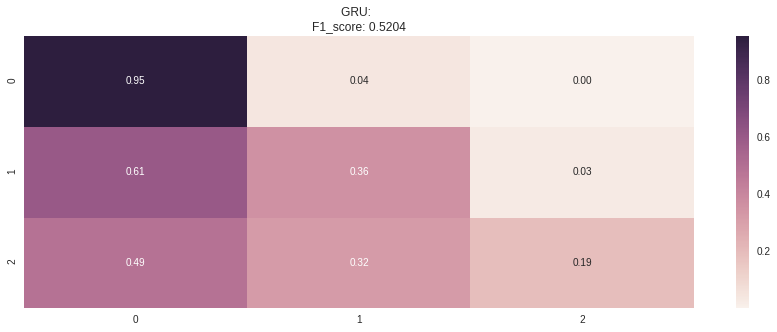

In [0]:
summarize_net(rnn1, X_test, y_test, "GRU:  ")

### Model 1 v.2: GRU

Change embedding size from 50 to 100

In [0]:
#version 2 with 100 embedding dim and 25 state vectors
NUM_CLASSES=3
EMBED_SIZE = 100
input_holder = Input(shape=(X_train.shape[1], ))
input_embed = Embedding(top_words, # input dimension (max int of OHE)
                EMBED_SIZE, # output dimension size
                input_length=MAX_ART_LEN)(input_holder) # number of words in each sequence


#MODEL 1  = GRU
x = GRU(25,dropout=0.2, recurrent_dropout=0.2)(input_embed)
x = Dense(NUM_CLASSES, activation='sigmoid')(x)
rnn1_2=Model(inputs=input_holder,outputs=x)
rnn1_2.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy',f1])   #add in f score

print(rnn1_2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 36)                0         
_________________________________________________________________
embedding_18 (Embedding)     (None, 36, 100)           1576800   
_________________________________________________________________
gru_15 (GRU)                 (None, 25)                9450      
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 78        
Total params: 1,586,328
Trainable params: 1,586,328
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
#fit model 1 version 2
rnn1_2.fit(X_train, y_train_ohe, validation_data=(X_test, y_test_ohe), epochs=3, batch_size=64)

Train on 9761 samples, validate on 4879 samples
Epoch 1/3
9761/9761 [==============================] - 22s 2ms/step - loss: 0.7738 - acc: 0.6638 - f1: 0.4830 - val_loss: 0.7461 - val_acc: 0.6917 - val_f1: 0.4553
Epoch 2/3
9761/9761 [==============================] - 17s 2ms/step - loss: 0.5770 - acc: 0.7424 - f1: 0.6529 - val_loss: 0.8481 - val_acc: 0.7014 - val_f1: 0.4689
Epoch 3/3
9761/9761 [==============================] - 18s 2ms/step - loss: 0.5236 - acc: 0.7742 - f1: 0.6775 - val_loss: 0.8773 - val_acc: 0.7020 - val_f1: 0.4725


F1_score: 0.519
Accuracy: 0.702


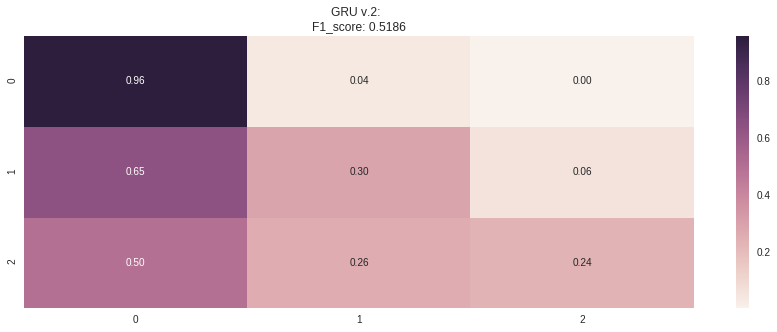

In [0]:
summarize_net(rnn1_2, X_test, y_test, "GRU v.2:  ")

Although we attempted several combinations of different parameters (all attempts not shown), we could not achieve improvement in the F1 score. We are not correctly classifying the neutral and positive tweets.

### Model 2: LSTM

In [0]:
#MODEL 2 = LSTM
NUM_CLASSES=3
EMBED_SIZE = 50
input_holder = Input(shape=(X_train.shape[1], ))
input_embed = Embedding(top_words, # input dimension (max int of OHE)
                EMBED_SIZE, # output dimension size
                input_length=MAX_ART_LEN)(input_holder) # number of words in each sequence


x = LSTM(25,dropout=0.2, recurrent_dropout=0.2)(input_embed)
x = Dense(NUM_CLASSES, activation='sigmoid')(x)
rnn2=Model(inputs=input_holder,outputs=x)
rnn2.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy',f1])

rnn2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 36)                0         
_________________________________________________________________
embedding_19 (Embedding)     (None, 36, 50)            788400    
_________________________________________________________________
lstm_7 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 78        
Total params: 796,078
Trainable params: 796,078
Non-trainable params: 0
_________________________________________________________________


In [0]:
#fit model 2
rnn2.fit(X_train, y_train_ohe, validation_data=(X_test, y_test_ohe), epochs=3, batch_size=64)

Train on 9761 samples, validate on 4879 samples
Epoch 1/3
9761/9761 [==============================] - 26s 3ms/step - loss: 0.7795 - acc: 0.6770 - f1: 0.4607 - val_loss: 0.7763 - val_acc: 0.6844 - val_f1: 0.4462
Epoch 2/3
9761/9761 [==============================] - 21s 2ms/step - loss: 0.6088 - acc: 0.7410 - f1: 0.6400 - val_loss: 0.8318 - val_acc: 0.6901 - val_f1: 0.4667
Epoch 3/3
9761/9761 [==============================] - 21s 2ms/step - loss: 0.5368 - acc: 0.7585 - f1: 0.6736 - val_loss: 0.8131 - val_acc: 0.6969 - val_f1: 0.4810


F1_score: 0.487
Accuracy: 0.697


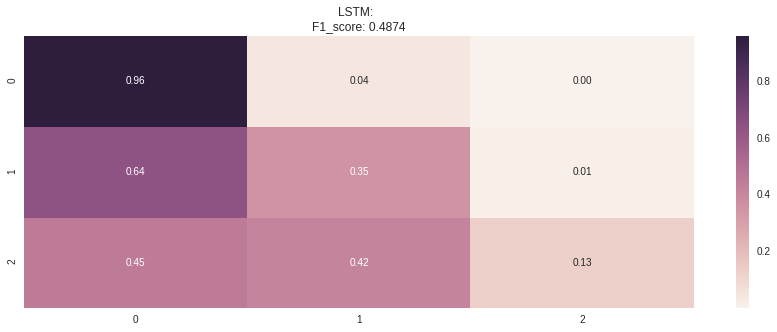

In [0]:
summarize_net(rnn2, X_test, y_test, "LSTM:  ")

The LSTM model performs worse than the GRU model (both with 50 embedding size and 25 state vectors). We are unable to correctly classify the neutral and positive tweets.

### Model 2 v.2: LSTM

Change embedding size, number of state vectors, dropout, activation, and optimizer.

In [0]:
#version 2
NUM_CLASSES=3
EMBED_SIZE = 250
input_holder = Input(shape=(X_train.shape[1], ))
input_embed = Embedding(top_words, # input dimension (max int of OHE)
                EMBED_SIZE, # output dimension size
                input_length=MAX_ART_LEN)(input_holder) # number of words in each sequence


x = LSTM(100,dropout=0.4, recurrent_dropout=0.2)(input_embed)  #change dropout?
x = Dense(NUM_CLASSES, activation='softmax')(x)
rnn2_2=Model(inputs=input_holder,outputs=x)
rnn2_2.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy',f1])

rnn2_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        (None, 36)                0         
_________________________________________________________________
embedding_20 (Embedding)     (None, 36, 250)           3942000   
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               140400    
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 303       
Total params: 4,082,703
Trainable params: 4,082,703
Non-trainable params: 0
_________________________________________________________________


In [0]:
#fit model 2 v.2
rnn2_2.fit(X_train, y_train_ohe, validation_data=(X_test, y_test_ohe), epochs=3, batch_size=64)

Train on 9761 samples, validate on 4879 samples
Epoch 1/3
9761/9761 [==============================] - 28s 3ms/step - loss: 0.7015 - acc: 0.7105 - f1: 0.3695 - val_loss: 0.6938 - val_acc: 0.7303 - val_f1: 0.4723
Epoch 2/3
9761/9761 [==============================] - 21s 2ms/step - loss: 0.4071 - acc: 0.8442 - f1: 0.7560 - val_loss: 0.8301 - val_acc: 0.7469 - val_f1: 0.5441
Epoch 3/3
9761/9761 [==============================] - 22s 2ms/step - loss: 0.2644 - acc: 0.9030 - f1: 0.8623 - val_loss: 0.8207 - val_acc: 0.7465 - val_f1: 0.5583


F1_score: 0.644
Accuracy: 0.746


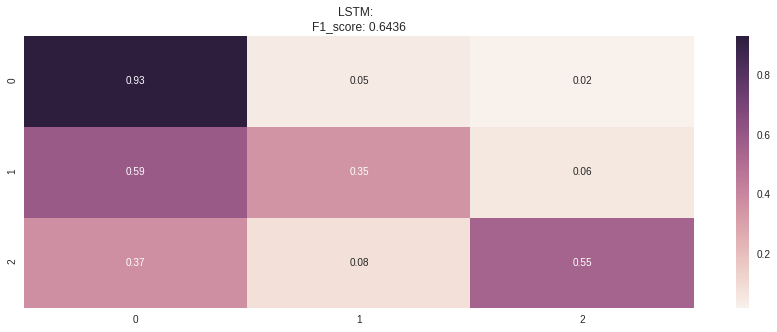

In [0]:
summarize_net(rnn2_2, X_test, y_test, "LSTM:  ")

We achieved the best F1 score with this version of the LSTM model. We also see improvement for the number of positive tweets we are able to correctly classify.

### Chained RNN

**[20 points] Using the best RNN parameters and architecture, add a second recurrent chain to your RNN. The input to the second chain should be the output sequence of the first chain. Visualize the performance of training and validation sets versus the training iterations. 
**

Based on f1 scores of the four models above, the second LSTM model outperforms the other three.  So we are going to add the second chain to the second LSTM model.

In [0]:
from keras.models import Sequential, Input, Model
from keras.layers import Dense
from keras.layers import SimpleRNN, LSTM, GRU
from keras.layers.embeddings import Embedding

NUM_CLASSES=3
EMBED_SIZE = 250
input_holder = Input(shape=(X_train.shape[1], ))
input_embed = Embedding(top_words, # input dimension (max int of OHE)
                EMBED_SIZE, # output dimension size
                input_length=MAX_ART_LEN)(input_holder) # number of words in each sequence


#MODEL WITH SECOND CHAIN
x = LSTM(100,dropout=0.4, recurrent_dropout=0.2,return_sequences=True)(input_embed)
x = LSTM(50,dropout=0.4, recurrent_dropout=0.2)(x)
x = Dense(NUM_CLASSES, activation='sigmoid')(x)
rnn2_2_=Model(inputs=input_holder,outputs=x)
rnn2_2_.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy',f1])   #add in f score

print(rnn2_2_.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 36)                0         
_________________________________________________________________
embedding_21 (Embedding)     (None, 36, 250)           3942000   
_________________________________________________________________
lstm_9 (LSTM)                (None, 36, 100)           140400    
_________________________________________________________________
lstm_10 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 153       
Total params: 4,112,753
Trainable params: 4,112,753
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
history_rnn2_2_=rnn2_2_.fit(X_train, y_train_ohe, validation_data=(X_test, y_test_ohe), epochs=3, batch_size=64)

Train on 9761 samples, validate on 4879 samples
Epoch 1/3
9761/9761 [==============================] - 48s 5ms/step - loss: 0.7072 - acc: 0.6933 - f1: 0.5566 - val_loss: 0.8007 - val_acc: 0.6897 - val_f1: 0.4535
Epoch 2/3
9761/9761 [==============================] - 41s 4ms/step - loss: 0.5152 - acc: 0.7932 - f1: 0.7045 - val_loss: 0.8883 - val_acc: 0.7333 - val_f1: 0.5146
Epoch 3/3
9761/9761 [==============================] - 41s 4ms/step - loss: 0.4039 - acc: 0.8470 - f1: 0.7690 - val_loss: 0.9533 - val_acc: 0.7401 - val_f1: 0.5081


In [0]:
#function to plot history of the model

#source code from https://www.tensorflow.org/tutorials/keras/basic_regression?fbclid=IwAR1qVx-2N7V32MwLwws5wZf6QBW5WVlpBa-JXS262kLo8hOEPFH1Bue1GKY
import matplotlib.pyplot as plt

def plot_history(history):
  plt.figure(figsize=(12,4))
  plt.subplot(1,3,1)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['acc']),
           label='Train ')
  plt.plot(history.epoch, np.array(history.history['val_acc']),
           label = 'Val ')
  plt.legend()
  
  plt.subplot(1,3,2)
  plt.xlabel('Epoch')
  plt.ylabel('F1 score')
  plt.plot(history.epoch, np.array(history.history['f1']),
           label = 'Train')
  plt.plot(history.epoch, np.array(history.history['val_f1']),
           label = 'Val ')
  plt.legend()
  
  plt.subplot(1,3,3)
  plt.xlabel('Epoch')
  plt.ylabel('MSE Loss')
  plt.plot(history.epoch, np.array(history.history['loss']),
           label = 'Train')
  plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val ')
  plt.legend()
  



F1_score: 0.619
Accuracy: 0.74


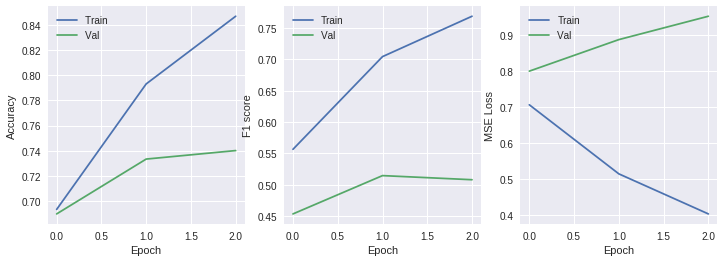

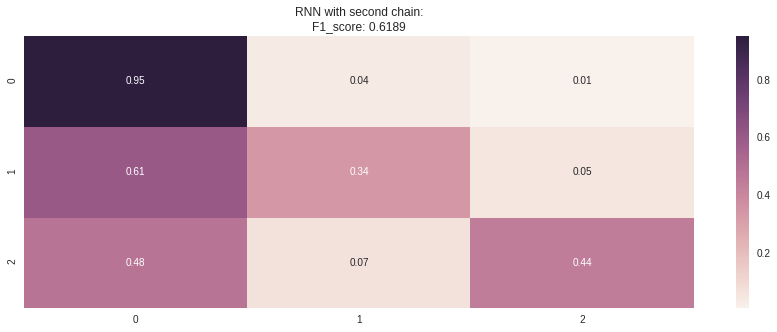

In [0]:
#visualize the last fold
plot_history(history_rnn2_2_)
summarize_net(rnn2_2_, X_test, y_test, title_text='RNN with second chain:')

This chained model appears to have similar performance to the LSTM model without the second chain.  However, the LSTM without the second chain was able to correctly classify more positive tweets than this model.

# Cross Validation

**[20 points] Use the method of cross validation and evaluation criteria that you argued for at the beginning of the lab. Visualize the results of all the RNNs you trained.  Use proper statistical comparison techniques to determine which method(s) is (are) superior.  **

In [0]:
#Visualize results of all RNNs
from sklearn import metrics as mt
from matplotlib import pyplot as plt
from skimage.io import imshow
import seaborn as sns
%matplotlib inline

def compare_rnns(rnn, X_test, y_test, index, title_text=''):
  yhat_rnn = np.argmax(rnn.predict(X_test), axis=1)
  acc_rnn = mt.accuracy_score(y_test,yhat_rnn)
  f1_rnn = mt.f1_score(y_test, yhat_rnn, average='macro')
  plt.subplot(3,2,index)
  cm = mt.confusion_matrix(y_test,yhat_rnn)
  cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
  sns.heatmap(cm, annot=True, fmt='.2f')
  plt.title(title_text +'\nF1_score: ' + str(np.round(f1_rnn, 3)))

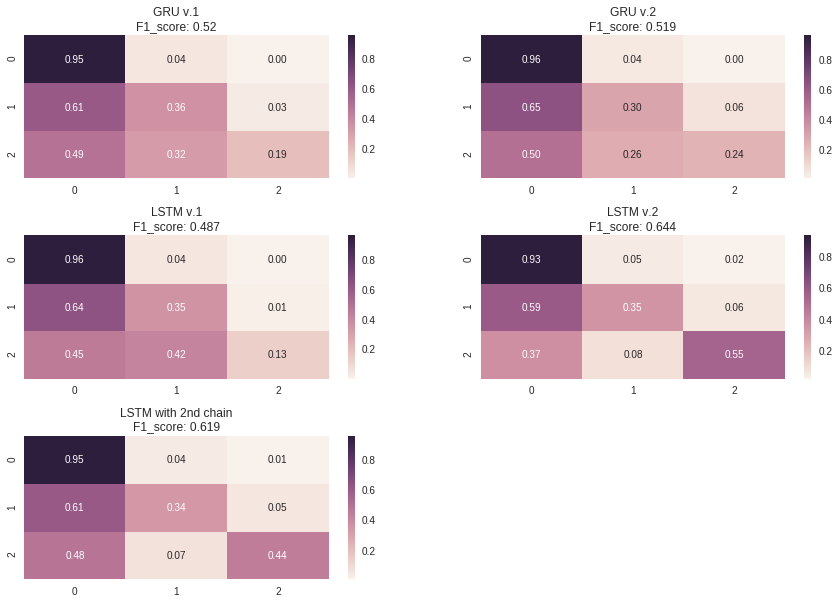

In [0]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.4)
compare_rnns(rnn1, X_test, y_test, 1, 'GRU v.1' )
compare_rnns(rnn1_2, X_test, y_test, 2, 'GRU v.2')
compare_rnns(rnn2, X_test, y_test, 3, 'LSTM v.1')
compare_rnns(rnn2_2, X_test, y_test, 4, 'LSTM v.2')
compare_rnns(rnn2_2_, X_test, y_test, 5, 'LSTM with 2nd chain')

LSTM v.2 and the LSTM with the second chain appear to have the best performance based on the F1 score.  All models appear to have good performance when classifying negative tweets but poor performance classifying positive and neutral tweets. 

In [0]:
#using cv to compare performance

from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

skf = StratifiedKFold(n_splits=3,  random_state=1)
skf.get_n_splits(X,y_int)

print(skf)
X_train_list, X_test_list,y_train_ohe_list, y_test_ohe_list, y_train_list, y_test_list = [], [], [],[],[],[]
for train_index, test_index in skf.split(X,y_int):
    X_train, X_test = X[train_index], X[test_index]    
    y_train, y_test = y_int[train_index], y_int[test_index]
    y_train_ohe, y_test_ohe = y_ohe[train_index], y_ohe[test_index]
  
    
 
    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_ohe_list.append(y_train_ohe)
    y_test_ohe_list.append(y_test_ohe)
    y_train_list.append(y_train)
    y_test_list.append(y_test)

StratifiedKFold(n_splits=3, random_state=1, shuffle=False)


In [0]:
#MODEL 1 
def rnn1_model():
  from keras.models import Sequential, Input, Model
  from keras.layers import Dense
  from keras.layers import SimpleRNN, LSTM, GRU
  from keras.layers.embeddings import Embedding

  NUM_CLASSES=3
  EMBED_SIZE = 50
  input_holder = Input(shape=(X_train.shape[1], ))
  input_embed = Embedding(top_words, # input dimension (max int of OHE)
                  EMBED_SIZE, # output dimension size
                  input_length=MAX_ART_LEN)(input_holder) # number of words in each sequence


  #MODEL 1 = GRU
  x = GRU(25,dropout=0.2, recurrent_dropout=0.2)(input_embed)
  x = Dense(NUM_CLASSES, activation='sigmoid')(x)
  rnn1=Model(inputs=input_holder,outputs=x)
  return rnn1


In [0]:
#MODEL 2 IS VERSION 2 OF GRU

def rnn1_2model():
  #version 2 with 100 embedding dim and 25 state vectors
  NUM_CLASSES=3
  EMBED_SIZE = 100
  input_holder = Input(shape=(X_train.shape[1], ))
  input_embed = Embedding(top_words, # input dimension (max int of OHE)
                  EMBED_SIZE, # output dimension size
                  input_length=MAX_ART_LEN)(input_holder) # number of words in each sequence


  #MODEL 1  = GRU
  x = GRU(25,dropout=0.2, recurrent_dropout=0.2)(input_embed)
  x = Dense(NUM_CLASSES, activation='sigmoid')(x)
  rnn1_2=Model(inputs=input_holder,outputs=x)
  return rnn1_2

In [0]:
#MODEL 3 = LSTM
def rnn2_model():
  from keras.models import Sequential, Input, Model
  from keras.layers import Dense
  from keras.layers import LSTM, GRU
  from keras.layers.embeddings import Embedding

  NUM_CLASSES=3
  EMBED_SIZE = 50
  input_holder = Input(shape=(X_train.shape[1], ))
  input_embed = Embedding(top_words, # input dimension (max int of OHE)
                  EMBED_SIZE, # output dimension size
                  input_length=MAX_ART_LEN)(input_holder) # number of words in each sequence


  x = LSTM(25,dropout=0.2, recurrent_dropout=0.2)(input_embed)
  x = Dense(NUM_CLASSES, activation='sigmoid')(x)
  rnn2=Model(inputs=input_holder,outputs=x)
  return rnn2

In [0]:
#MODEL 4 IS VERSION 2 OF LSTM
def rnn2_2model():
  from keras.models import Sequential, Input, Model
  from keras.layers import Dense
  from keras.layers import LSTM, GRU
  from keras.layers.embeddings import Embedding

  #version 2
  NUM_CLASSES=3
  EMBED_SIZE = 250
  input_holder = Input(shape=(X_train.shape[1], ))
  input_embed = Embedding(top_words, # input dimension (max int of OHE)
                  EMBED_SIZE, # output dimension size
                  input_length=MAX_ART_LEN)(input_holder) # number of words in each sequence


  x = LSTM(100,dropout=0.4, recurrent_dropout=0.2)(input_embed)  #change dropout?
  x = Dense(NUM_CLASSES, activation='softmax')(x)
  rnn2_2=Model(inputs=input_holder,outputs=x)
  return rnn2_2


In [0]:
#MODEL 5 IS VERSION 2 OF LSTM WITH SECOND CHAIN
def rnn2_2_model():
  
  from keras.models import Sequential, Input, Model
  from keras.layers import Dense
  from keras.layers import SimpleRNN, LSTM, GRU
  from keras.layers.embeddings import Embedding

  NUM_CLASSES=3
  EMBED_SIZE = 250
  input_holder = Input(shape=(X_train.shape[1], ))
  input_embed = Embedding(top_words, # input dimension (max int of OHE)
                EMBED_SIZE, # output dimension size
                input_length=MAX_ART_LEN)(input_holder) # number of words in each sequence


  #MODEL WITH SECOND CHAIN
  x = LSTM(100,dropout=0.4, recurrent_dropout=0.2,return_sequences=True)(input_embed)
  x = LSTM(50,dropout=0.4, recurrent_dropout=0.2)(x)
  x = Dense(NUM_CLASSES, activation='sigmoid')(x)
  rnn2_2_=Model(inputs=input_holder,outputs=x)
     #add in f score
  return rnn2_2_


In [0]:
from sklearn import metrics as mt
f1_all=[]
for func in [rnn1_model, rnn1_2model, rnn2_model, rnn2_2model, rnn2_2_model]:   
  f1s=[]
  for j in range(3):
    mods = func()

    # Let's train the model 
    mods.compile(loss='categorical_crossentropy', 
                optimizer='rmsprop', 
                metrics=['accuracy',f1]) 

    mods.fit(X_train_list[j], y_train_ohe_list[j], validation_data=(X_test_list[j], y_test_ohe_list[j]), epochs=3, batch_size=64)

    yhat=np.argmax(mods.predict(X_test_list[j]), axis=1)
    f1_s = mt.f1_score(np.array(y_test_list[j]), np.array(yhat), average='macro')
    f1s.append(f1_s)
    mods=()
  f1_all.append(f1s)
    
  

Train on 9759 samples, validate on 4881 samples
Epoch 1/3
9759/9759 [==============================] - 24s 2ms/step - loss: 0.8035 - acc: 0.6695 - f1: 0.4620 - val_loss: 0.7043 - val_acc: 0.7015 - val_f1: 0.5610
Epoch 2/3
9759/9759 [==============================] - 17s 2ms/step - loss: 0.6102 - acc: 0.7519 - f1: 0.6402 - val_loss: 0.6593 - val_acc: 0.7296 - val_f1: 0.5909
Epoch 3/3
9759/9759 [==============================] - 17s 2ms/step - loss: 0.5406 - acc: 0.7909 - f1: 0.6752 - val_loss: 0.6535 - val_acc: 0.7367 - val_f1: 0.6123
Train on 9760 samples, validate on 4880 samples
Epoch 1/3
9760/9760 [==============================] - 24s 2ms/step - loss: 0.8186 - acc: 0.6641 - f1: 0.4551 - val_loss: 0.6671 - val_acc: 0.7285 - val_f1: 0.4982
Epoch 2/3
9760/9760 [==============================] - 18s 2ms/step - loss: 0.6301 - acc: 0.7458 - f1: 0.6304 - val_loss: 0.6457 - val_acc: 0.7406 - val_f1: 0.5298
Epoch 3/3
9760/9760 [==============================] - 18s 2ms/step - loss: 0.5709 -

F1 scores for each fold per model:

In [0]:
f1_all

[[0.6127476684238476, 0.6424716485176046, 0.5055094762152547],
 [0.6169779131014446, 0.6483842805541041, 0.527882273615396],
 [0.6175938373269237, 0.611662296603991, 0.3954258503315451],
 [0.6881333136664062, 0.7151060157822339, 0.6541826319259302],
 [0.6745638092988834, 0.7250202104219663, 0.6232070527359829]]

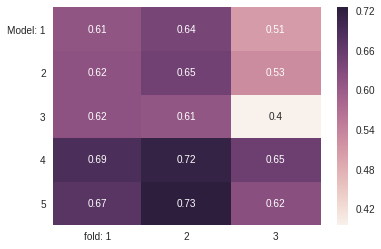

In [0]:
ax=sns.heatmap(f1_all,yticklabels=["Model: 1",2,3,4,5], xticklabels=["fold: 1", 2, 3], annot=True)
plt.yticks(rotation=0)
plt.show()

In [0]:
for i in range(len(f1_all)): 
  m=np.mean(f1_all[i])
  sd=np.std(f1_all[i])
  print('Model '+str(i+1)+': mean = '+str(np.round(m,4))+' std = '+str(np.round(sd,4)))

Model 1: mean = 0.5869 std = 0.0588
Model 2: mean = 0.5977 std = 0.051
Model 3: mean = 0.5416 std = 0.1034
Model 4: mean = 0.6858 std = 0.0249
Model 5: mean = 0.6743 std = 0.0416


Statistical tests on the models:

In [0]:
#setting up for multiple comparisons
#source: http://cleverowl.uk/2015/07/01/using-one-way-anova-and-tukeys-test-to-compare-data-sets/

import numpy as np
f1_all2=np.asarray(f1_all)

ms=['M1', 'M2','M3','M4','M5']

datas=[]
for i in range(len(ms)):
  for j in range(3):
    #print(f1_all2[i,j])
    d=ms[i], f1_all2[i,j]
    datas.append(d)
    
datas=np.rec.array(datas, dtype=[('Model','|U2'),('F1-Score','<f8')])

In [0]:
#using multiple comparison with Tukey correction
#source: http://cleverowl.uk/2015/07/01/using-one-way-anova-and-tukeys-test-to-compare-data-sets/

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(datas['F1-Score'], datas['Model'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  M1     M2    0.0108  -0.1926 0.2143 False 
  M1     M3   -0.0453  -0.2488 0.1581 False 
  M1     M4    0.0989  -0.1045 0.3023 False 
  M1     M5    0.0874  -0.1161 0.2908 False 
  M2     M3   -0.0562  -0.2596 0.1473 False 
  M2     M4    0.0881  -0.1154 0.2915 False 
  M2     M5    0.0765  -0.1269  0.28  False 
  M3     M4    0.1442  -0.0592 0.3477 False 
  M3     M5    0.1327  -0.0707 0.3361 False 
  M4     M5   -0.0115   -0.215 0.1919 False 
--------------------------------------------
['M1' 'M2' 'M3' 'M4' 'M5']


In [0]:
#Import mlxtend

!pip install -q mlxtend

In [0]:
#Code from http://rasbt.github.io/mlxtend/user_guide/evaluate/mcnemar/

#McNemar Test

import numpy as np
from mlxtend.evaluate import mcnemar_table
from mlxtend.evaluate import mcnemar
from mlxtend.plotting import checkerboard_plot
import matplotlib.pyplot as plt

def mcnemar_rnns(rnn1, rnn2, title_text1='', title_text2=''):

  # Class labels predicted by model 1
  yhat_rnn1 = np.argmax(rnn1.predict(X_test), axis=1)

  # Class labels predicted by model 2
  yhat_rnn2 = np.argmax(rnn2.predict(X_test), axis=1)

  tb = mcnemar_table(y_target=y_test, 
                     y_model1=yhat_rnn1, 
                     y_model2=yhat_rnn2)

  chi2, p = mcnemar(ary=tb, corrected=True)
  print('chi-squared:', chi2)
  print('p-value:', p)
  
  brd = checkerboard_plot(tb,
                          figsize=(5, 5),
                          fmt='%d',
                          col_labels=[title_text1 + ' right', title_text1 + ' wrong'],
                          row_labels=[title_text2 + ' right', title_text2 + ' wrong'])
  plt.show()

chi-squared: 2.3622047244094486
p-value: 0.12430639675215277


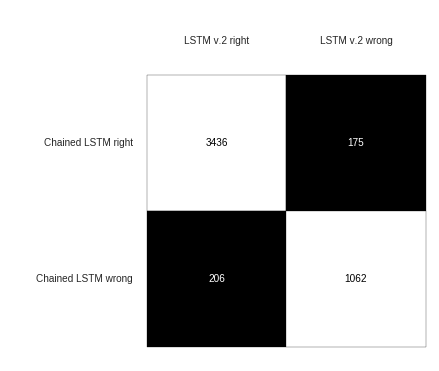

In [0]:
mcnemar_rnns(rnn2_2, rnn2_2_, 'LSTM v.2', 'Chained LSTM')

We calculated the averages of the macro f1 scores from the cross validation for five models. We found that Model 4 and Model 5 tend to have higher f1 scores. From the Tukey Multiple Comparison of the Means Test, we failed to reject null hypothesis that the mean performance of each pair of models are the same. So we cannot say that any of the models is statistically better. Also, the result from the McNemar Test of models 4 and 5 is not significant. We chose to use the McNemar Test only on these models since they were the best perfoming. We concluded that the difference between these models is not statistically significant which agrees with what we found in our multiple comparison tests. 

If we were to choose a "best" model, it would be Model 4 (LSTM with 250 embedding size and 100 state vectors) since it has one of the higher f1 scores and is able to classify more positive tweets. Overall, we would not choose to deploy any of these models since they are only good at capturing which tweets are negative. 

# Exceptional Work (10 points total)

**One idea (required for 7000 level students): Use t-SNE (or SVD) to visualize the word embeddings of a subset of words in your vocabulary. Try to interpret what each dimension reflects (in your own words). That is, try to explain what aspect of the language is encoded in the reduced dimensionality embedding. **

We did the 500*4 face ratings as an alternative. 